In [1]:
import pandas
import datetime
import math
import os
import numpy
from davitpy.models import *
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [2]:
# setup some params
testDate = datetime.datetime( 2011, 3, 2, 2, 2, 30 )
# only choose the North American sector for analysis
glonRngNA = [ -165., -60. ]
binSize = 5.
binCutoff = 0.5

In [3]:
fltdTrghLocFname = "../data/test-fltrdTrghLoc.txt"
fltTecDataDF = pandas.read_csv(fltdTrghLocFname, sep=' ',\
                            parse_dates=["date"],\
                               infer_datetime_format=True)
fltTecDataDF.head()

,BndEquGlat,BndEquMlat,BndEquMlon,BndEquTecVal,BndGlon,BndPolGlat,BndPolMlat,BndPolMlon,BndPolTecVal,date,minFltrdTecVal,minTecGlat,minTecMlat,minTecMlon,minTecVal
0,38,47.634053,-37.976848,4.3,-105,44,53.490621,-38.841781,5.35,2011-02-05 02:32:30,3.881276,40,49.582218,-38.251632,3.4
1,38,47.794316,-36.738952,4.2,-104,44,53.643162,-37.552536,5.10,2011-02-05 02:32:30,3.730546,40,49.739906,-36.996803,3.4
2,38,47.950059,-35.489789,4.5,-103,44,53.790550,-36.251329,4.70,2011-02-05 02:32:30,3.939476,41,50.866049,-35.855276,3.7
3,43,54.150050,-15.556051,6.5,-88,50,60.836759,-15.643711,5.00,2011-02-05 02:32:30,4.273354,47,57.972376,-15.584212,3.9
4,42,53.210803,-14.144962,6.9,-87,51,61.798285,-14.180143,6.40,2011-02-05 02:32:30,4.862104,46,57.027693,-14.126782,4.4


In [4]:

selTrDF = fltTecDataDF[ (fltTecDataDF["date"] == testDate) & \
                       (fltTecDataDF["BndGlon"] >= glonRngNA[0]) &\
                      (fltTecDataDF["BndGlon"] <= glonRngNA[1]) ].reset_index(drop=True)
selTrDF.head()

,BndEquGlat,BndEquMlat,BndEquMlon,BndEquTecVal,BndGlon,BndPolGlat,BndPolMlat,BndPolMlon,BndPolTecVal,date,minFltrdTecVal,minTecGlat,minTecMlat,minTecMlon,minTecVal
0,44,55.119523,-12.700280,6.7,-86,57,67.455857,-12.829833,6.20,2011-03-02 02:02:30,2.462761,48,58.938937,-12.673222,1.00
1,44,55.111065,-11.270429,6.7,-85,57,67.447539,-11.268012,6.20,2011-03-02 02:02:30,2.582391,48,58.929376,-11.209919,1.20
2,43,54.110099,-8.450846,7.5,-83,50,60.788383,-8.240582,3.70,2011-03-02 02:02:30,2.752367,48,58.880311,-8.288618,1.85
3,43,54.019424,-5.618372,7.0,-81,52,62.607023,-5.222742,1.45,2011-03-02 02:02:30,1.999888,49,59.747096,-5.338945,1.60
4,43,53.958363,-4.207771,7.0,-80,54,64.450506,-3.650925,5.95,2011-03-02 02:02:30,2.125773,49,59.688923,-3.884564,1.50


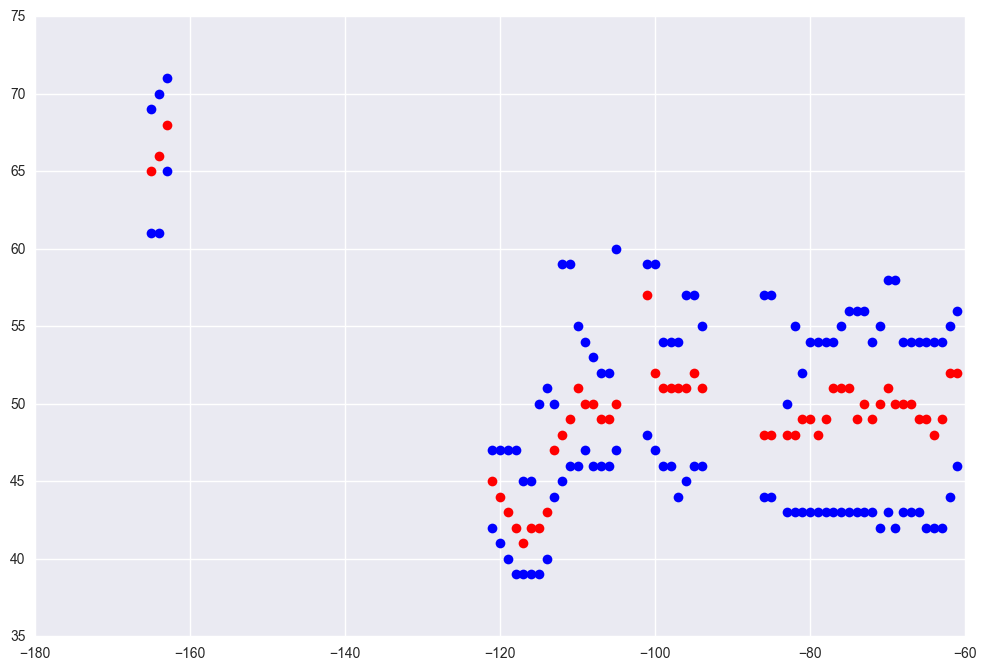

In [5]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)

ax.plot( selTrDF["BndGlon"], selTrDF["BndEquGlat"], "bo" )
ax.plot( selTrDF["BndGlon"], selTrDF["minTecGlat"], "ro" )
ax.plot( selTrDF["BndGlon"], selTrDF["BndPolGlat"], "bo" )
# ax.plot( BndEquMlonArr, BndEquMlatArr, "bo" )
# ax.plot( minTecMlonArr, minTecMlatArr, "ro" )
# ax.plot( BndPolMlonArr, BndPolMlatArr, "bo" )
# f.savefig("../figs/bndry-" + nrstTime.strftime("%Y%m%d-%H%M") + ".pdf",bbox_inches='tight')

In [6]:
# Now we need to detect portions in the NA sector
# where data is missing for that we'll divide the
# data into bins of 5 deg and find bins where the
# number of data points is less(than 50%) and discard them.
binList = [ b for b in numpy.arange(glonRngNA[0],glonRngNA[1],binSize) ]
glonFreq, glonBins = numpy.histogram(selTrDF["BndGlon"], bins=binList)
selInds = numpy.where( glonFreq >= binCutoff*binSize )
# Now select longitudes which satisfy this criteria
# This is an interval (bin) so need to add another last element of glon
selGlons = numpy.append( glonBins[selInds], glonBins[selInds[-1][-1] + 1] )
print selGlons

[-165. -120. -115. -110. -100.  -85.  -80.  -75.  -70.  -65.]


In [7]:
print glonFreq[selInds], glonBins[selInds]

[3 5 5 5 5 4 5 5 6] [-165. -120. -115. -110. -100.  -85.  -80.  -75.  -70.]


In [8]:
print numpy.diff( selTrDF["BndGlon"] )

[   1.    2.    2.    1.  -38.    1.    1.    1.    1.    1.    8.   11.
   15.    1.    1.   16. -103.    1.   -2.   83.  -37.    7.    1.   11.
    1.    1.    1.    1.   27.    1.    1.    1.    1.    2.    1.  -59.
   11.    1.   14.   24.    1.  -36.   30.    1.    1.  -34.  -12.   48.
   -1.  -28.   37.  -43.]


In [23]:
sortedGlonArr = numpy.sort( selTrDF["BndGlon"] )
# print sortedGlonArr
# print numpy.diff( sortedGlonArr )
# Identify sudden and big jumps in Long
# We'll identify jumps by using the gradient
# Function!
glonGradInds = numpy.where( numpy.diff( sortedGlonArr ) > 5. )
# print sortedGlonArr[glonGradInds], glonGradInds[-1], len(sortedGlonArr)
# Need to get the length of the segments
segLgnthArr = []
currStrtElmnt = 0
for ele in glonGradInds[-1]:
    segLgnthArr.append( ele - currStrtElmnt )
    currStrtElmnt = ele
segLgnthArr.append( len(sortedGlonArr) - currStrtElmnt )
print segLgnthArr
print glonGradInds

[2, 25, 26]
(array([ 2, 27]),)


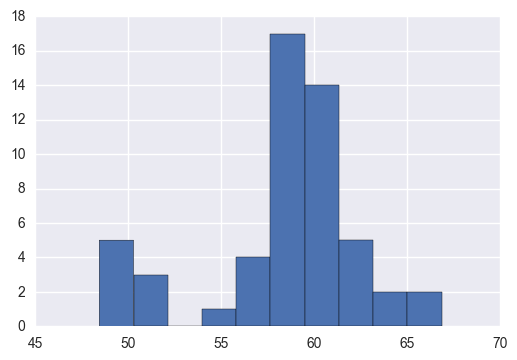

In [10]:
# plt.plot( selTrDF["minFltrdTecVal"], "." )
plt.hist( selTrDF["minTecMlat"] )
meanTecValTrghMin = selTrDF["minFltrdTecVal"].mean()
stdTecValTrghMin = selTrDF["minFltrdTecVal"].std()
# Discard the trough locations which are more than
# 1 std away...

In [11]:
meanGlonTrghMin = selTrDF["minTecMlat"].mean()
stdGlonTrghMin = selTrDF["minTecMlat"].std()
print meanGlonTrghMin, stdGlonTrghMin
print selTrDF["minTecMlat"].describe()

58.4540233007 4.18598078876
count    53.000000
mean     58.454023
std       4.185981
min      48.442995
25%      57.813942
50%      59.149895
75%      61.091150
max      66.852954
Name: minTecMlat, dtype: float64
